Every company wants to increase its revenue and profitability. To do that, while they acquire new customers, they also want to make sure that the existing ones stay with them for a long term. Also, its strategically important to know beforehand whether a set of customers are planning to stop using their services (especially recurring ones like internet, cable, phone etc.). To do that, every company or business creates and tracks customer metrics which are then used to predict their likelihood of churn.

Customer Churn for a company occurs when a customer decides to stop using the services of that company. In this project, we will be using the customer data of a telecom sector company based in the US to predict the probability of churn for each of the customer. 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Loading the dataset

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
# Examining the data

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dropping customerID column

df=df.drop(["customerID"],axis=1)

In [5]:
# Examining the data types

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

By verifying the data we can see that all are imported with coorect data types except the variable TotalCharges should be a float data type. 

In [6]:
# Casting TotalCharges to float

df["TotalCharges"]= pd.to_numeric(df["TotalCharges"], errors="coerce")

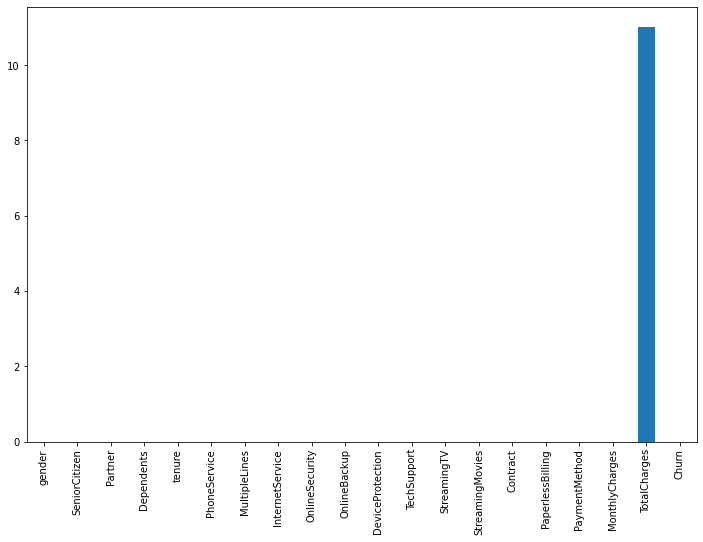

In [7]:
# checking the nulls

df.isnull().sum().plot.bar(figsize=(12,8))

Our dataset has null values for 11 records in Variable TotalCharges, so lets drop those 11 records

In [8]:
# Drop Null values

df=df.dropna()
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Label Encoding for gender and churn

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender"]= le.fit_transform(df["gender"])
df["Churn"]= le.fit_transform(df["Churn"])

Splitting the dataset into train and test

In [10]:
# Defining the X and y

X = df.loc[:,df.columns!="Churn"]
y = df["Churn"]
y=y.values.reshape(-1,1)

In [11]:
# Splitting the training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

To encode all categorical variables at the same time, let's first make a list with their names:


In [12]:
# Filtering all Categorical variables

vars_categorical = list(df.select_dtypes(['object']).columns)
print(vars_categorical)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Numerical Categories are easier for the machines to compute and train algorithms. So lets encode using One hot Encoder

In [13]:
# One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', drop='first', sparse=False) 
encoder.fit(X_train[vars_categorical])
X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical]) 


In [14]:
# Verify the encoded output

X_train_enc


array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [15]:
# Loading the libraries

import tensorflow.keras
from keras.layers import Dense
from keras.models import Sequential 


Using TensorFlow backend.


In [16]:
# Initiate the model

model = Sequential()

# adding input layers

model.add(Dense(64, input_dim=25, activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

# printing the summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling the model

model.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])


In [18]:
X_train_enc.shape

(5625, 25)

In [19]:
# Training the model

epochs_hist= model.fit(X_train_enc,y_train,epochs=100,batch_size=25)

Epoch 1/100
5625/5625 [==============================] - 2s 333us/step - loss: 0.5249 - accuracy: 0.7442
Epoch 2/100
5625/5625 [==============================] - 1s 144us/step - loss: 0.4393 - accuracy: 0.7849
Epoch 3/100
5625/5625 [==============================] - 1s 142us/step - loss: 0.4351 - accuracy: 0.7858
Epoch 4/100
5625/5625 [==============================] - 1s 152us/step - loss: 0.4329 - accuracy: 0.7868
Epoch 5/100
5625/5625 [==============================] - 1s 162us/step - loss: 0.4308 - accuracy: 0.7890
Epoch 6/100
5625/5625 [==============================] - 1s 141us/step - loss: 0.4278 - accuracy: 0.7879
Epoch 7/100
5625/5625 [==============================] - 1s 138us/step - loss: 0.4280 - accuracy: 0.7872
Epoch 8/100
5625/5625 [==============================] - 1s 139us/step - loss: 0.4248 - accuracy: 0.7893
Epoch 9/100
5625/5625 [==============================] - 1s 142us/step - loss: 0.4227 - accuracy: 0.7895
Epoch 10/100
5625/5625 [==============================]

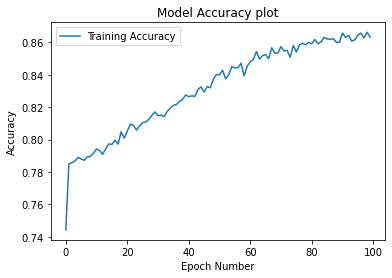

In [20]:
# Plotting the accuracy

import matplotlib.pyplot as plt
plt.plot(epochs_hist.history["accuracy"])
plt.title('Model Accuracy plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['Training Accuracy'])

In [21]:
# Predicting the test samples

y_pred=model.predict(X_test_enc)

In [22]:
# Converting y_pred to binary

y_pred = (y_pred > 0.5)

In [23]:
# Printing the confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[860 191]
 [178 178]]


In [24]:
# Printing the accuracy

accuracy_score(y_pred,y_test)

0.7377398720682303